In [2]:
import pandas as pd

df=pd.read_csv("/content/Telco_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
n=(df['Churn']=='Yes').value_counts()[0]
m=(df['Churn']=='No').value_counts()[1]
print((n/(n+m))*100)
print((m/(n+m))*100)

73.4630129206304
26.536987079369588


/tmp/ipython-input-2761465669.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n=(df['Churn']=='Yes').value_counts()[0]
/tmp/ipython-input-2761465669.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=(df['Churn']=='No').value_counts()[1]


In [4]:
print(df.shape)

(7043, 21)


In [5]:
df=df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
# df.info()
df = df.dropna(subset=['TotalCharges'])
# df['TotalCharges']=df['TotalCharges'].isna().sum()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df

/tmp/ipython-input-3297587669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [7]:
Y=df['Churn']
print(df.columns)
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

categorical_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transform=Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
)

preproccessor=ColumnTransformer(
    transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transform,categorical_features)
    ]
)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=Pipeline(
    steps=[('preprocessor',preproccessor),
        ('classifier',LogisticRegression(max_iter=1000))])

model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

print("Accuracy Score:\n ", accuracy_score(Y_test,y_pred))
print("Confusion matrix:\n ", confusion_matrix(Y_test,y_pred))
print("Classification report: \n",classification_report(Y_test,y_pred))

Accuracy Score:
  0.8038379530916845
Confusion matrix:
  [[917 116]
 [160 214]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [16]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# fit only on training data
X_train_processed=preproccessor.fit_transform(X_train)
X_test_processed=preproccessor.fit_transform(X_test)

#building the neural network
model = Sequential([ # linear stacks of layer
    Dense(16,activation='relu',input_shape=(X_train_processed.shape[1],)), #no of neurons,16 outputs,activation, no of input features,
                     #it decides each data has 25 featue- vlaue of [1] first layer expects 25 inputs
    Dropout(0.3), # randomly turns off 30% of neurons  which prevents oveerfitting
    Dense(8,activation='relu'), # secondhidden layer
    Dropout(0.2), # drps 20% neurons randomly
    Dense(1,activation='sigmoid') # single output neuron , binary claassification problem
])

#complie the model

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
#add early stopping
early_stop=EarlyStopping( # callback, takes action automatically when a condition is met # it prevents overtraining
    monitor='val_loss',# error on validation set
    patience=5,  # wait for 5 epochs before stooping of no imp happens, if val_loss does not imp for 5 con epochs training stops
    restore_best_weights=True
)


#train the model
history=model.fit(X_train_processed,Y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stop],verbose=1)

#make prediction
y_pred_prob=model.predict(X_test_processed)
y_pred=(y_pred_prob>0.4).astype(int)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
# print(history.history)

# After seeing the output we get to know that neural network gives worse accuracy thsn logistic regression. So for tabular data we can consider LR is good.




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5418 - loss: 0.6991 - val_accuracy: 0.7511 - val_loss: 0.5597
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5505 - val_accuracy: 0.7840 - val_loss: 0.4468
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.4961 - val_accuracy: 0.7876 - val_loss: 0.4252
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7778 - loss: 0.4656 - val_accuracy: 0.7893 - val_loss: 0.4173
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.4700 - val_accuracy: 0.7929 - val_loss: 0.4168
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.4641 - val_accuracy: 0.7964 - val_loss: 0.4110
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7872 - loss: 0.4503 - val_accuracy: 0.7991 - val_loss: 0.4126
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4465 - val_accu

For this churn dataset, Logistic Regression is preferred because it provides competitive recall with significantly lower complexity, better interpretability, and easier deployment. The slight improvement from Neural Network does not justify the added complexity.


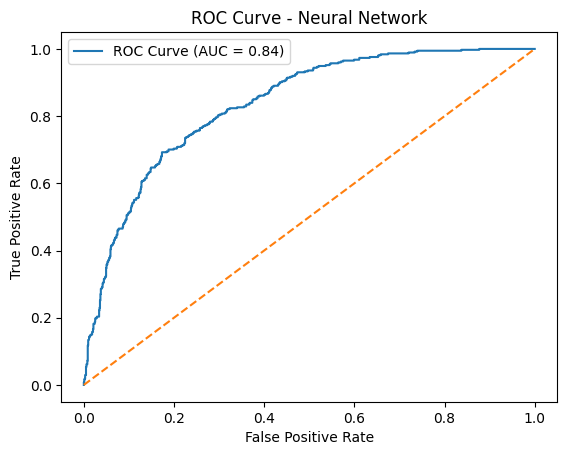

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities (flatten because keras returns 2D array)
y_prob = y_pred_prob.ravel()

# Compute ROC values
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.show()


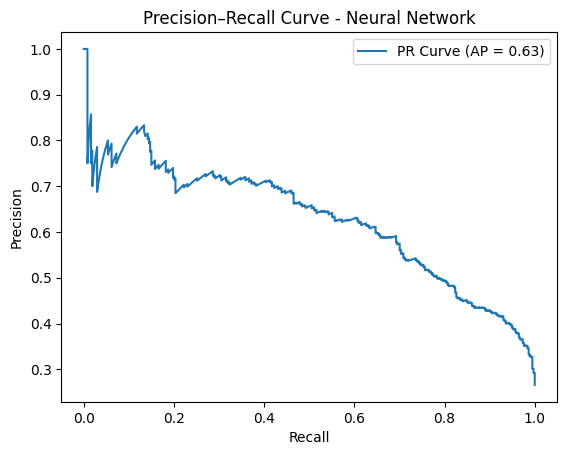

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)
pr_auc = average_precision_score(Y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AP = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve - Neural Network')
plt.legend()
plt.show()
